<a href="https://colab.research.google.com/github/arturomolin/Tarea1/blob/main/Tiempos_De_Ejecuci%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Det

Tiempo de ejecución Det: 0.001517 segundos para 1000 ejecuciones (Tamaño 2)
Tiempo de ejecución Det: 0.040995 segundos para 1000 ejecuciones (Tamaño 3)
Tiempo de ejecución Det: 0.197307 segundos para 1000 ejecuciones (Tamaño 4)
Tiempo de ejecución Det: 1.005118 segundos para 1000 ejecuciones (Tamaño 5)
Tiempo de ejecución Det: 7.206287 segundos para 1000 ejecuciones (Tamaño 6)
Tiempo de ejecución Det: 46.712043 segundos para 1000 ejecuciones (Tamaño 7)


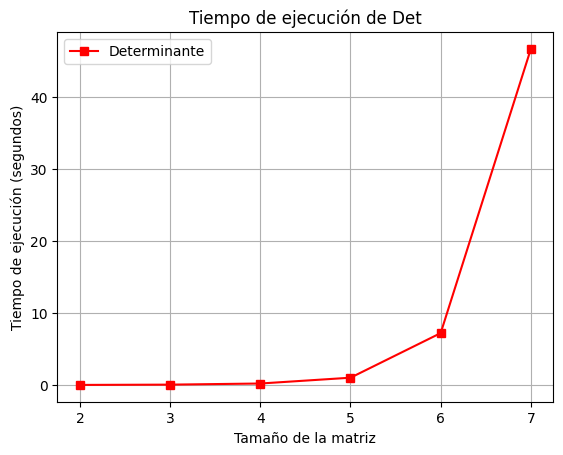

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def SubMat(Mat, ren, col):
    M1 = np.copy(Mat)
    M1 = np.delete(M1, ren, axis=0)
    M1 = np.delete(M1, col, axis=1)
    return M1

def Det(Mat):
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])
    deter = 0.0
    for col in range(Mat.shape[0]):
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter

sizes     = range(2, 8)  # Elegimos el tamaño de la matriz de 2 a 7 porque el determinante crece de forma exponencial.
execution_times_det = []

for size in sizes:
    Mat = np.random.randint(10, 101, (size, size))  # Matriz cuadrada aleatoria para determinante

    time_det = timeit.timeit(lambda: Det(Mat), number=1000)
    execution_times_det.append(time_det)
    print(f"Tiempo de ejecución Det: {time_det:.6f} segundos para 1000 ejecuciones (Tamaño {size})")

plt.plot(sizes, execution_times_det, marker='s', linestyle='-', color='r', label='Determinante')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de Det')
plt.legend()
plt.grid()
plt.show()


# SolveInv

Tiempo de ejecución SolveInv: 0.773709 segundos para 1000 ejecuciones (Tamaño 2)
Tiempo de ejecución SolveInv: 0.374405 segundos para 1000 ejecuciones (Tamaño 3)
Tiempo de ejecución SolveInv: 1.196415 segundos para 1000 ejecuciones (Tamaño 4)
Tiempo de ejecución SolveInv: 6.061246 segundos para 1000 ejecuciones (Tamaño 5)
Tiempo de ejecución SolveInv: 47.352289 segundos para 1000 ejecuciones (Tamaño 6)


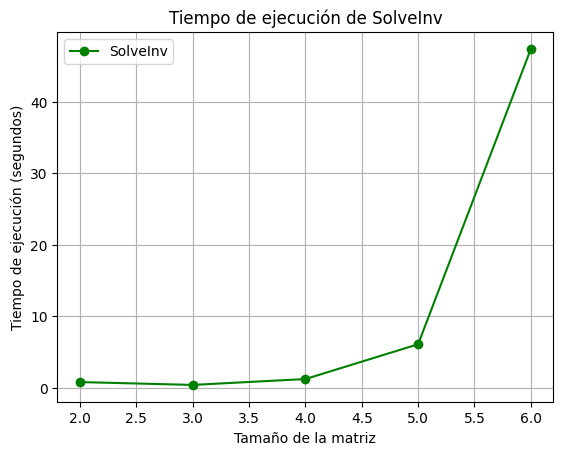

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def SubMat(Mat, ren, col):
    M1 = np.copy(Mat)
    M1 = np.delete(M1, ren, axis=0)
    M1 = np.delete(M1, col, axis=1)
    return M1

def Det(Mat):
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])
    deter = 0.0
    for col in range(Mat.shape[0]):
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter

def Inv(Mat):
    deter = Det(Mat)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")
    Cofac = Cofactores(Mat)
    Cofac = Transpuesta(Cofac)
    Inversa = (1 / deter) * Cofac
    return Inversa

def SolveInv(Mat, vec):
    InvMat = Inv(Mat)
    Solucion = InvMat @ vec
    return Solucion

sizes = range(2, 7)  # Definimos los tamaños de matriz de 2 a 6  ya que la inversa y determinante crecen en complejidad
execution_times_inv = []

for size in sizes:
    Mat = np.random.randint(10, 101, (size, size))  # Matriz cuadrada aleatoria
    vec = np.random.randint(10, 101, size)  # Vector aleatorio

    time_inv = timeit.timeit(lambda: SolveInv(Mat, vec), number=1000)
    execution_times_inv.append(time_inv)
    print(f"Tiempo de ejecución SolveInv: {time_inv:.6f} segundos para 1000 ejecuciones (Tamaño {size})")

plt.plot(sizes, execution_times_inv, marker='o', linestyle='-', color='g', label='SolveInv')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de SolveInv')
plt.legend()
plt.grid()
plt.show()


# SustitucionAtras

Tiempo de ejecución SustitucionAtras: 0.034426 segundos para 1000 ejecuciones (Tamaño 10)
Tiempo de ejecución SustitucionAtras: 0.114898 segundos para 1000 ejecuciones (Tamaño 20)
Tiempo de ejecución SustitucionAtras: 0.240061 segundos para 1000 ejecuciones (Tamaño 30)
Tiempo de ejecución SustitucionAtras: 0.427601 segundos para 1000 ejecuciones (Tamaño 40)
Tiempo de ejecución SustitucionAtras: 0.634046 segundos para 1000 ejecuciones (Tamaño 50)
Tiempo de ejecución SustitucionAtras: 0.942135 segundos para 1000 ejecuciones (Tamaño 60)
Tiempo de ejecución SustitucionAtras: 1.235497 segundos para 1000 ejecuciones (Tamaño 70)
Tiempo de ejecución SustitucionAtras: 1.644711 segundos para 1000 ejecuciones (Tamaño 80)
Tiempo de ejecución SustitucionAtras: 2.048123 segundos para 1000 ejecuciones (Tamaño 90)
Tiempo de ejecución SustitucionAtras: 3.704275 segundos para 1000 ejecuciones (Tamaño 100)


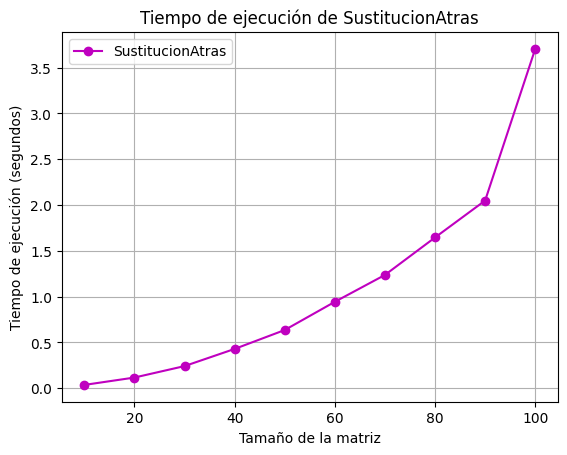

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def SustitucionAtras(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

sizes = range(10, 101, 10) #Definimos el tamaño de la matriz de 10 a 100
execution_times_sust = []

for size in sizes:
    Mat = np.triu(np.random.randint(1, 101, (size, size)))  # Matriz triangular superior
    b = np.random.randint(10, 101, size)  # Vector aleatorio

    time_sust = timeit.timeit(lambda: SustitucionAtras(Mat, b), number=1000)
    execution_times_sust.append(time_sust)
    print(f"Tiempo de ejecución SustitucionAtras: {time_sust:.6f} segundos para 1000 ejecuciones (Tamaño {size})")

plt.plot(sizes, execution_times_sust, marker='o', linestyle='-', color='m', label='SustitucionAtras')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de SustitucionAtras')
plt.legend()
plt.grid()
plt.show()


# SustitucionDelante

Tiempo de ejecución SustitucionDelante: 0.035824 segundos para 1000 ejecuciones (Tamaño 10)
Tiempo de ejecución SustitucionDelante: 0.112782 segundos para 1000 ejecuciones (Tamaño 20)
Tiempo de ejecución SustitucionDelante: 0.247375 segundos para 1000 ejecuciones (Tamaño 30)
Tiempo de ejecución SustitucionDelante: 0.433753 segundos para 1000 ejecuciones (Tamaño 40)
Tiempo de ejecución SustitucionDelante: 0.912098 segundos para 1000 ejecuciones (Tamaño 50)
Tiempo de ejecución SustitucionDelante: 1.774332 segundos para 1000 ejecuciones (Tamaño 60)
Tiempo de ejecución SustitucionDelante: 1.362504 segundos para 1000 ejecuciones (Tamaño 70)
Tiempo de ejecución SustitucionDelante: 1.618628 segundos para 1000 ejecuciones (Tamaño 80)
Tiempo de ejecución SustitucionDelante: 2.078869 segundos para 1000 ejecuciones (Tamaño 90)
Tiempo de ejecución SustitucionDelante: 2.538103 segundos para 1000 ejecuciones (Tamaño 100)


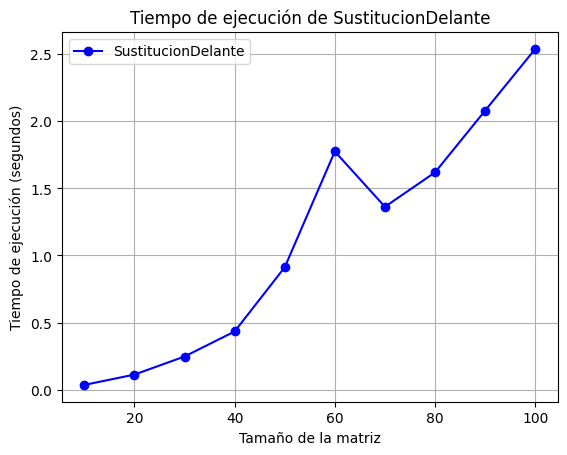

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def SustitucionDelante(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

sizes = range(10, 101, 10)  #Definimos el tamaño de la matriz de 10 a 100
execution_times_sust_delante = []

for size in sizes:
    MatDelante = np.tril(np.random.randint(1, 101, (size, size)))  # Matriz triangular inferior
    b = np.random.randint(10, 101, size)  # Vector aleatorio

    time_sust_delante = timeit.timeit(lambda: SustitucionDelante(MatDelante, b), number=1000)
    execution_times_sust_delante.append(time_sust_delante)

    print(f"Tiempo de ejecución SustitucionDelante: {time_sust_delante:.6f} segundos para 1000 ejecuciones (Tamaño {size})")


plt.plot(sizes, execution_times_sust_delante, marker='o', linestyle='-', color='b', label='SustitucionDelante')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de SustitucionDelante')
plt.legend()
plt.grid()
plt.show()


# SolverDiagonal

Tiempo de ejecución: 0.006340 segundos para 1000 ejecuciones (Tamaño 10)
Tiempo de ejecución: 0.008973 segundos para 1000 ejecuciones (Tamaño 20)
Tiempo de ejecución: 0.014042 segundos para 1000 ejecuciones (Tamaño 30)
Tiempo de ejecución: 0.018132 segundos para 1000 ejecuciones (Tamaño 40)
Tiempo de ejecución: 0.019610 segundos para 1000 ejecuciones (Tamaño 50)
Tiempo de ejecución: 0.022198 segundos para 1000 ejecuciones (Tamaño 60)
Tiempo de ejecución: 0.025271 segundos para 1000 ejecuciones (Tamaño 70)
Tiempo de ejecución: 0.029682 segundos para 1000 ejecuciones (Tamaño 80)
Tiempo de ejecución: 0.031867 segundos para 1000 ejecuciones (Tamaño 90)
Tiempo de ejecución: 0.035359 segundos para 1000 ejecuciones (Tamaño 100)


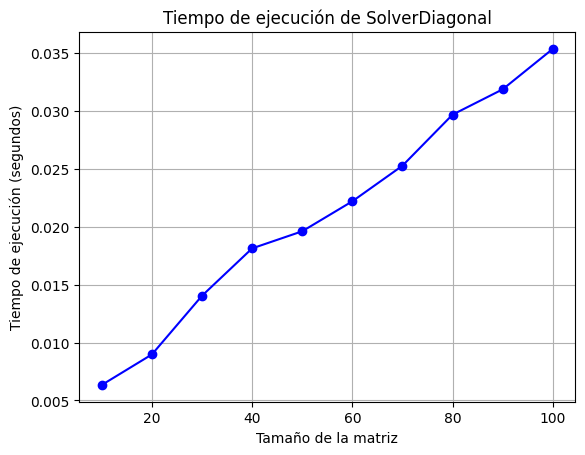

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def SolverDiagonal(A, b):
    n = len(A)
    x = np.zeros_like(A, dtype=float)
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

tamaño = range(10, 101, 10)  #Definimos el tamaño de la matriz de 10 a 100
ejecucion_tiempo = []

for size in tamaño:
    A = np.random.randint(10, 101, size)  # Matriz diagonal con valores aleatorios
    b = np.random.randint(10, 101, size)  # Vector b con valores aleatorios

    tiempo = timeit.timeit(lambda: SolverDiagonal(A, b), number=1000)
    ejecucion_tiempo.append(tiempo)
    print(f"Tiempo de ejecución: {tiempo:.6f} segundos para 1000 ejecuciones (Tamaño {size})")

plt.plot(tamaño, ejecucion_tiempo, marker='o', linestyle='-', color='b')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de SolverDiagonal')
plt.grid()
plt.show()

# Algoritmo de Thomas



Tiempo de ejecución: 0.024969 segundos para 1000 ejecuciones (Tamaño 10)
Tiempo de ejecución: 0.041907 segundos para 1000 ejecuciones (Tamaño 20)
Tiempo de ejecución: 0.061528 segundos para 1000 ejecuciones (Tamaño 30)
Tiempo de ejecución: 0.082665 segundos para 1000 ejecuciones (Tamaño 40)
Tiempo de ejecución: 0.107238 segundos para 1000 ejecuciones (Tamaño 50)
Tiempo de ejecución: 0.125691 segundos para 1000 ejecuciones (Tamaño 60)
Tiempo de ejecución: 0.152789 segundos para 1000 ejecuciones (Tamaño 70)
Tiempo de ejecución: 0.162378 segundos para 1000 ejecuciones (Tamaño 80)
Tiempo de ejecución: 0.187934 segundos para 1000 ejecuciones (Tamaño 90)
Tiempo de ejecución: 0.204369 segundos para 1000 ejecuciones (Tamaño 100)


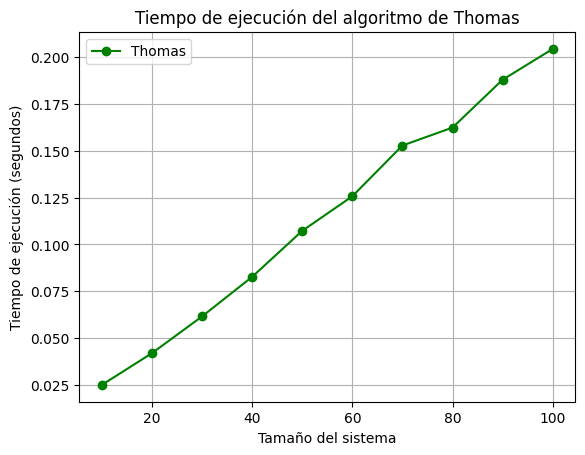

In [ ]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def Thomas(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)
    DP_copy = DP.astype(float)  # Debemos de asegurar que los calculos se puedan cumplir en punto flotante
    for i in range(1, n):
        if DP_copy[i-1] == 0:
            raise ValueError("Cero en la diagonal principal, no se puede continuar con el método de Thomas.")
        factor = DI[i-1] / DP_copy[i-1]
        DP_copy[i] -= factor * DS[i-1]
        b[i] -= factor * b[i-1]
    x[-1] = b[-1] / DP_copy[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i+1]) / DP_copy[i]
    return x

sizes = range(10, 101, 10)  #Definimos el tamaño de la matriz de 10 a 100
execution_times_thomas = []

for size in sizes:
    DP = np.random.randint(1, 101, size).astype(float)  # Diagonal principal
    DS = np.random.randint(1, 101, size - 1).astype(float)  # Diagonal superior
    DI = np.random.randint(1, 101, size - 1).astype(float)  # Diagonal inferior
    b = np.random.randint(10, 101, size).astype(float)  # Vector de términos independientes

    time_thomas = timeit.timeit(lambda: Thomas(DP.copy(), DS.copy(), DI.copy(), b.copy()), number=1000)
    execution_times_thomas.append(time_thomas)
    print(f"Tiempo de ejecución: {time_thomas:.6f} segundos para 1000 ejecuciones (Tamaño {size})")


plt.plot(sizes, execution_times_thomas, marker='o', linestyle='-', color='g', label='Thomas')
plt.xlabel('Tamaño del sistema')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución del algoritmo de Thomas')
plt.legend()
plt.grid()
plt.show()

